ИССЛЕДОВАНИЕ ЛОГНОРМАЛЬНОГО РАСПРЕДЕЛЕНИЯ

1. Пример плотности при mu=0, sigma=0.5:


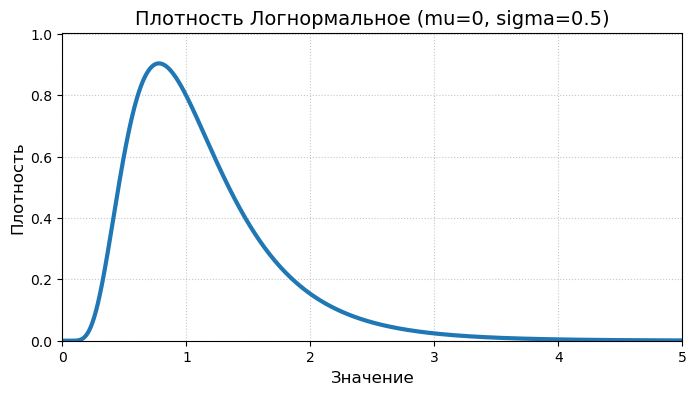


2. Интерактивное исследование плотности (используйте слайдеры):

3. Сравнение гистограммы и плотности для mu=0, sigma=0.8:


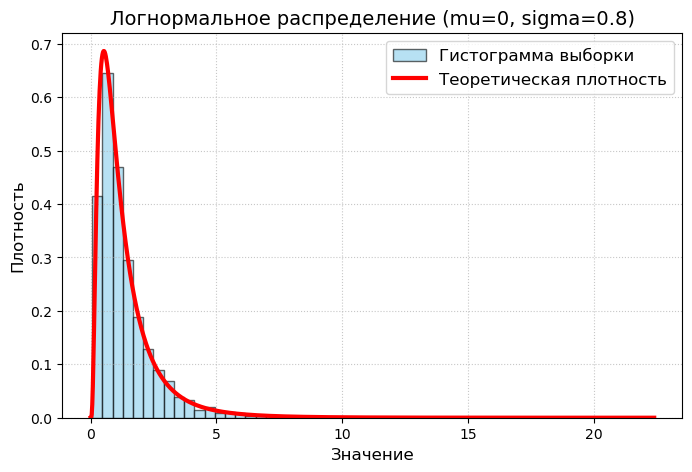

Выборочное среднее: 1.3858
Теоретическое среднее: 1.3771
Выборочная дисперсия: 1.6841
Теоретическая дисперсия: 1.7002
Относительная ошибка среднего: 0.63%
Относительная ошибка дисперсии: 0.94%

4. Плотности при разных параметрах (фиксированный mu=0):


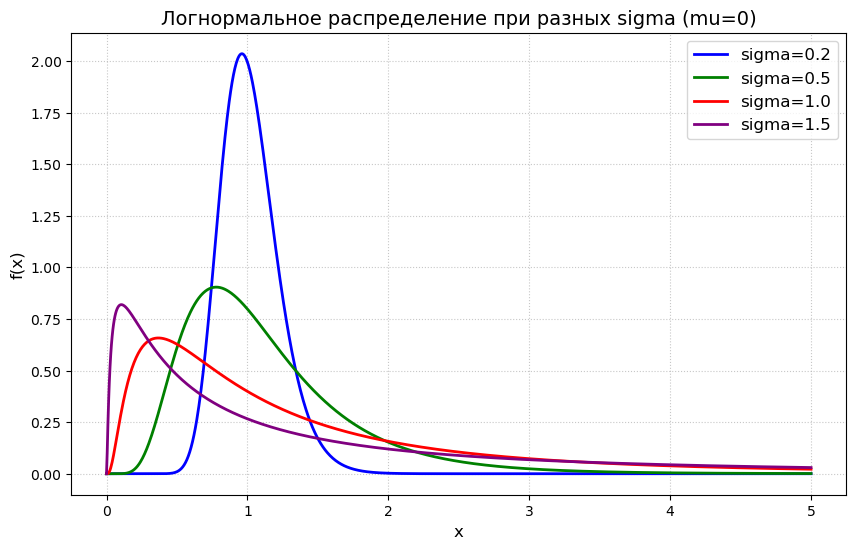


5. Плотности при разных параметрах (фиксированный sigma=0.5):


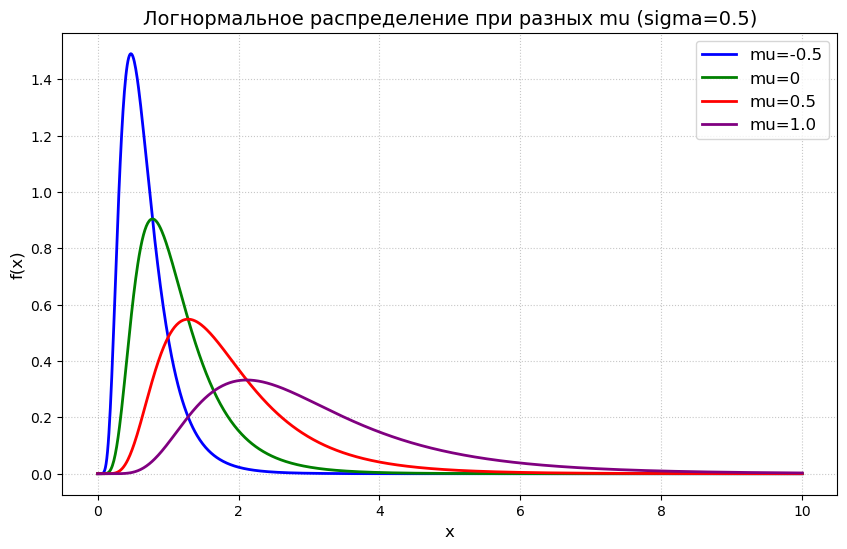


Для интерактивного исследования используйте виджет ниже:


interactive(children=(IntSlider(value=100, description='Сетка', max=500, min=50, step=50), FloatSlider(value=5…

In [2]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interactive, FloatSlider, IntSlider, fixed

# Вспомогательная функция для отрисовки плотности
def show_pdf(pdf, xmin, xmax, grid_size, distr_name, **kwargs):
    X = np.linspace(xmin, xmax, grid_size)
    Y = pdf(X, **kwargs)
    ymax = max(Y) + 0.1 if max(Y) < np.inf else 10  # ограничение для бесконечных значений
    
    plt.figure(figsize=(8, 4))
    plt.plot(X, Y, lw=3)
    plt.grid(ls=':', alpha=0.7)
    plt.xlabel('Значение', fontsize=12)
    plt.ylabel('Плотность', fontsize=12)
    plt.xlim((xmin, xmax))
    plt.ylim((0, ymax))
    title = f'Плотность {distr_name}'.format(**kwargs)
    plt.title(title, fontsize=14)
    plt.show()

# Функция для генерации выборки и сравнения с плотностью
def plot_lognormal(mu, sigma, n_points=10000):
    # Генерация выборки
    sample = sts.lognorm.rvs(s=sigma, scale=np.exp(mu), size=n_points)
    
    # Теоретические моменты
    mean_theory = np.exp(mu + sigma**2 / 2)
    var_theory = (np.exp(sigma**2) - 1) * np.exp(2*mu + sigma**2)
    
    # Границы для графика
    x_min = 0
    x_max = max(sample) * 1.1  # немного правее максимума выборки
    
    # Построение
    plt.figure(figsize=(8, 5))
    plt.hist(sample, bins=50, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Гистограмма выборки')
    
    grid = np.linspace(x_min, x_max, 1000)
    pdf_vals = sts.lognorm.pdf(grid, s=sigma, scale=np.exp(mu))
    plt.plot(grid, pdf_vals, 'r-', lw=3, label='Теоретическая плотность')
    
    plt.title(f'Логнормальное распределение (mu={mu}, sigma={sigma})', fontsize=14)
    plt.xlabel('Значение', fontsize=12)
    plt.ylabel('Плотность', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(ls=':', alpha=0.7)
    plt.show()
    
    # Вывод статистик
    print(f'Выборочное среднее: {sample.mean():.4f}')
    print(f'Теоретическое среднее: {mean_theory:.4f}')
    print(f'Выборочная дисперсия: {sample.var():.4f}')
    print(f'Теоретическая дисперсия: {var_theory:.4f}')
    print(f'Относительная ошибка среднего: {abs(sample.mean() - mean_theory) / mean_theory * 100:.2f}%')
    print(f'Относительная ошибка дисперсии: {abs(sample.var() - var_theory) / var_theory * 100:.2f}%')

# Исследование зависимости плотности от параметров
print("="*60)
print("ИССЛЕДОВАНИЕ ЛОГНОРМАЛЬНОГО РАСПРЕДЕЛЕНИЯ")
print("="*60)

# Пример 1: фиксированные параметры
print("\n1. Пример плотности при mu=0, sigma=0.5:")
show_pdf(pdf=sts.lognorm.pdf, xmin=0, xmax=5, grid_size=1000,
         distr_name='Логнормальное (mu=0, sigma=0.5)', s=0.5, scale=np.exp(0))

# Интерактивное исследование
print("\n2. Интерактивное исследование плотности (используйте слайдеры):")
def interactive_lognormal(grid_size=100, xmax=10, mu=0, sigma=1):
    show_pdf(pdf=sts.lognorm.pdf, xmin=0, xmax=xmax, grid_size=grid_size,
             distr_name=f'Логнормальное (mu={mu:.2f}, sigma={sigma:.2f})',
             s=sigma, scale=np.exp(mu))

interactive_plot = interactive(interactive_lognormal,
                               grid_size=IntSlider(min=50, max=500, step=50, value=100, description='Сетка'),
                               xmax=FloatSlider(min=1, max=20, step=0.5, value=5, description='x_max'),
                               mu=FloatSlider(min=-1, max=2, step=0.1, value=0, description='mu'),
                               sigma=FloatSlider(min=0.1, max=2, step=0.1, value=0.5, description='sigma'))

# Сравнение гистограммы и плотности
print("\n3. Сравнение гистограммы и плотности для mu=0, sigma=0.8:")
plot_lognormal(mu=0, sigma=0.8, n_points=5000)

# Исследование при разных параметрах
print("\n4. Плотности при разных параметрах (фиксированный mu=0):")
plt.figure(figsize=(10, 6))
sigmas = [0.2, 0.5, 1.0, 1.5]
colors = ['blue', 'green', 'red', 'purple']
x = np.linspace(0, 5, 1000)

for sigma, color in zip(sigmas, colors):
    pdf = sts.lognorm.pdf(x, s=sigma, scale=np.exp(0))
    plt.plot(x, pdf, color=color, lw=2, label=f'sigma={sigma}')
    
plt.title('Логнормальное распределение при разных sigma (mu=0)', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(ls=':', alpha=0.7)
plt.show()

print("\n5. Плотности при разных параметрах (фиксированный sigma=0.5):")
plt.figure(figsize=(10, 6))
mus = [-0.5, 0, 0.5, 1.0]
colors = ['blue', 'green', 'red', 'purple']
x = np.linspace(0, 10, 1000)

for mu, color in zip(mus, colors):
    pdf = sts.lognorm.pdf(x, s=0.5, scale=np.exp(mu))
    plt.plot(x, pdf, color=color, lw=2, label=f'mu={mu}')
    
plt.title('Логнормальное распределение при разных mu (sigma=0.5)', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(ls=':', alpha=0.7)
plt.show()

# Вывод интерактивного виджета
print("\nДля интерактивного исследования используйте виджет ниже:")
display(interactive_plot)